- References  
    - https://iai.postech.ac.kr/tutorials  
    - https://i-systems.github.io/tutorial/KSME/Advanced/220119/04_01_CAM.html
    - https://craftsangjae.github.io/deep-learning/2020/06/01/Keras-%EB%BD%80%EA%B0%9C%EA%B8%B0-(2)-%EB%AA%A8%ED%98%95%EC%9D%84-%EA%B5%AC%EC%84%B1%ED%95%98%EA%B8%B0,-Model.html

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [6]:
import tensorflow as tf

# TensorFlow가 GPU를 사용할 수 있는지 확인합니다.
print("TensorFlow 버전:", tf.__version__)
print("GPU 사용 가능:", tf.test.is_gpu_available())

# 사용 가능한 GPU 목록을 출력합니다.
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # 필요한 경우 메모리 증가를 허용합니다.
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    print("사용 가능한 GPU:", gpus)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가를 설정해야만 합니다.
    print(e)
else:
  print("GPU를 찾을 수 없습니다. CPU를 사용합니다.")

TensorFlow 버전: 2.10.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU 사용 가능: True
Physical devices cannot be modified after being initialized


In [3]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

train_x, train_y = train_x[0:6000], train_y[0:6000]
test_x, test_y = test_x[0:6000], test_y[0:6000]

n_train = train_x.shape[0]
n_test = test_x.shape[0]

print ("* The number of training images : {}, shape : {}".format(n_train, train_x.shape))
print ("* The number of testing images : {}, shape : {}".format(n_test, test_x.shape))

The number of training images : 6000, shape : (6000, 28, 28, 1)
The number of testing images : 6000, shape : (6000, 28, 28, 1)


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                          kernel_size = (3, 3),
                          activation = 'relu',
                          padding = 'SAME',
                          input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters = 64,
                          kernel_size = (3, 3),
                          activation = 'relu',
                          padding = 'SAME',
                          input_shape = (14, 14, 32)),
    
    tf.keras.layers.GlobalAveragePooling2D(),
    
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 global_average_pooling2d_1   (None, 64)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 19,466
Trainable params: 19,466
Non-trai

In [13]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')

In [14]:
history = model.fit(train_x, train_y, 
                    batch_size = 128, 
                    epochs = 100)

Epoch 1/100
47/47 [==============================] - 1s 8ms/step - loss: 2.2822 - accuracy: 0.1065
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 2.1967 - accuracy: 0.2087
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 1.9763 - accuracy: 0.3310
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 1.7782 - accuracy: 0.3708
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 1.6661 - accuracy: 0.4157
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 1.5941 - accuracy: 0.4433
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 1.5514 - accuracy: 0.4737
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4933 - accuracy: 0.5112
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4521 - accuracy: 0.5305
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4030 - accuracy: 0.5510
Epoch 11/

[2.282240867614746, 2.196701765060425, 1.9763171672821045, 1.7781976461410522, 1.6660836935043335, 1.5940546989440918, 1.5513755083084106, 1.4933053255081177, 1.4520583152770996, 1.4030042886734009, 1.352792501449585, 1.3038678169250488, 1.2545355558395386, 1.2068932056427002, 1.1553869247436523, 1.1180261373519897, 1.073224663734436, 1.03626549243927, 1.0028234720230103, 0.9704404473304749, 0.9346445202827454, 0.9110755324363708, 0.8730642795562744, 0.8728771805763245, 0.8381750583648682, 0.8069396018981934, 0.7924382090568542, 0.7733609080314636, 0.7535022497177124, 0.737689197063446, 0.7213702201843262, 0.7078512907028198, 0.6880722045898438, 0.6782236695289612, 0.6624000072479248, 0.6533145904541016, 0.6463916897773743, 0.6308497190475464, 0.6197288036346436, 0.612886905670166, 0.5996536612510681, 0.5945324897766113, 0.5873528718948364, 0.5823222994804382, 0.5634896159172058, 0.5563665628433228, 0.5469425320625305, 0.536016047000885, 0.5288664102554321, 0.5264395475387573, 0.524909

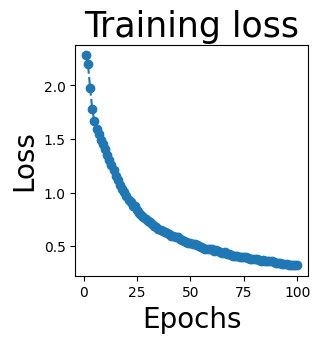

In [15]:
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.figure(figsize = (3,3))
plt.plot(epochs, loss, "o--", label="Training loss")
plt.title("Training loss", fontsize = 25)
plt.xlabel("Epochs", fontsize = 20)
plt.ylabel("Loss", fontsize = 20)
plt.savefig('Training loss.tiff')
print(loss)
plt.show()

[0.10649999976158142, 0.20866666734218597, 0.3310000002384186, 0.3708333373069763, 0.4156666696071625, 0.44333332777023315, 0.4736666679382324, 0.5111666917800903, 0.5304999947547913, 0.5509999990463257, 0.57833331823349, 0.6058333516120911, 0.621833324432373, 0.6383333206176758, 0.6651666760444641, 0.6685000061988831, 0.6863333582878113, 0.6958333253860474, 0.706333339214325, 0.7263333201408386, 0.7318333387374878, 0.7401666641235352, 0.7511666417121887, 0.7390000224113464, 0.7591666579246521, 0.7668333053588867, 0.7684999704360962, 0.7735000252723694, 0.7793333530426025, 0.7861666679382324, 0.7923333048820496, 0.7926666736602783, 0.8029999732971191, 0.8021666407585144, 0.8133333325386047, 0.8125, 0.8134999871253967, 0.8208333253860474, 0.825166642665863, 0.8238333463668823, 0.8301666378974915, 0.824833333492279, 0.8301666378974915, 0.8299999833106995, 0.8391666412353516, 0.8399999737739563, 0.8473333120346069, 0.8495000004768372, 0.8518333435058594, 0.8543333411216736, 0.851333320140

<Figure size 640x480 with 0 Axes>

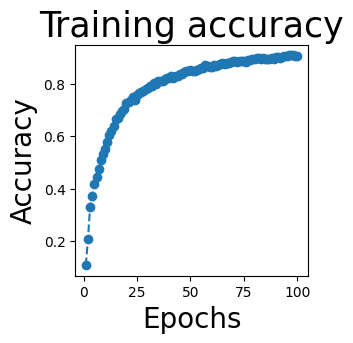

In [16]:
plt.clf()
plt.figure(figsize = (3,3))
acc = history.history["accuracy"]
plt.plot(epochs, acc, "o--", label="Training accuracy")
plt.title("Training accuracy", fontsize = 25)
plt.xlabel("Epochs", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.savefig('Accuracy.tiff')
print(acc)
plt.show()

In [17]:
# accuracy test
test_loss, test_acc = model.evaluate(test_x, test_y)

188/188 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8882


# CAM

In [22]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'conv2d_2_input'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_2',
    'trainable': True,
    'batch_input_shape': (None, 28, 28, 1),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d_1',
    'trainable': True,


In [31]:
print(len(model.layers))
model.layers

5


In [32]:
model.layers[4]

In [42]:
np.shape(model.layers[4].get_weights()[1])

(10,)

In [43]:
## Define the CAM
# get max pooling layer and fully connected layer 
conv_layer = model.get_layer(index = 2) # MaxPooling2D
fc_layer = model.layers[4].get_weights()[0] # Dense [0] w: (64,10) [1] b: (10,)

# Class activation map 
my_map = tf.matmul(conv_layer.output, fc_layer)
CAM = tf.keras.Model(inputs = model.inputs, outputs = my_map)

In [64]:
np.shape(fc_layer)

(64, 10)

In [45]:
## Compare the CAM data from input of 1, 7 and 9
# Select indices of test data of 1, 7 and 9
list_1 = []
list_7 = []
list_9 = []
for i in range(1000):
    if test_y[i] == 1:
        list_1.append(i)
    if test_y[i] == 7:
        list_7.append(i)
    if test_y[i] == 9:
        list_9.append(i)

In [70]:
i = np.random.randint(0, 90)
i = 10

1/1 [==============================] - 0s 12ms/step
* pred_1:  [1]
1/1 [==============================] - 0s 12ms/step


(-0.5, 27.5, 27.5, -0.5)

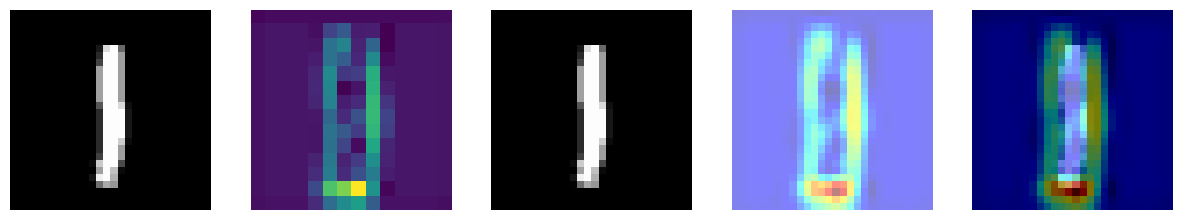

In [74]:
## Create CAM data for "1"
test_idx_1 = [list_1[i]]
test_image_1 = test_x[test_idx_1]
pred_1 = np.argmax(model.predict(test_image_1), axis = 1)
print("* pred_1: ", pred_1)
predCAM_1 = CAM.predict(test_image_1)

# pred_1 = 9
attention_1 = predCAM_1[:,:,:,pred_1]
attention_1 = np.abs(np.reshape(attention_1,(14,14)))

resized_attention_1 = cv2.resize(attention_1,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_1 = cv2.resize(test_image_1.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)

# Plot
plt.figure(figsize = (15,5))
plt.subplot(1,5,1)
plt.imshow(test_x[test_idx_1].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(1,5,2)
plt.imshow(attention_1)
plt.axis('off')
plt.subplot(1,5,3)
plt.imshow(resized_test_x_1, 'gray')
plt.axis('off')
plt.subplot(1,5,4)
plt.imshow(resized_attention_1, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(resized_test_x_1, 'gray')
plt.imshow(resized_attention_1, 'jet', alpha = 0.5)
plt.axis('off')

1/1 [==============================] - 0s 12ms/step
* pred_2:  [7]
1/1 [==============================] - 0s 11ms/step


(-0.5, 27.5, 27.5, -0.5)

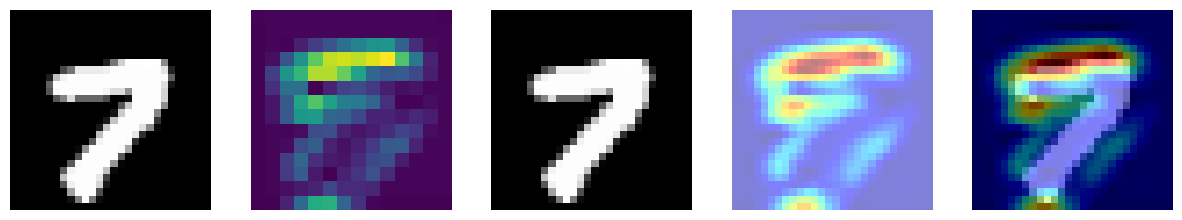

In [75]:
## Create CAM data for "7"
test_idx_2 = [list_7[i]]
test_image_2 = test_x[test_idx_2]

pred_2 = np.argmax(model.predict(test_image_2), axis = 1)
print("* pred_2: ", pred_2)
predCAM_2 = CAM.predict(test_image_2)

attention_2 = predCAM_2[:,:,:,pred_2]
attention_2 = np.abs(np.reshape(attention_2,(14,14)))

resized_attention_2 = cv2.resize(attention_2,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_2 = cv2.resize(test_image_2.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)

# Plot
plt.figure(figsize = (15,5))
plt.subplot(1,5,1)
plt.imshow(test_x[test_idx_2].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(1,5,2)
plt.imshow(attention_2)
plt.axis('off')
plt.subplot(1,5,3)
plt.imshow(resized_test_x_2, 'gray')
plt.axis('off')
plt.subplot(1,5,4)
plt.imshow(resized_attention_2, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(resized_test_x_2, 'gray')
plt.imshow(resized_attention_2, 'jet', alpha = 0.5)
plt.axis('off')

1/1 [==============================] - 0s 12ms/step
* pred_3:  [9]
1/1 [==============================] - 0s 11ms/step


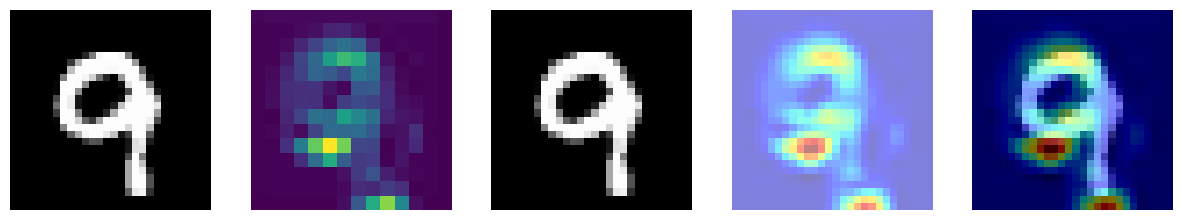

In [76]:
## Create CAM data for "9"
test_idx_3 = [list_9[i]]
test_image_3 = test_x[test_idx_3]

pred_3 = np.argmax(model.predict(test_image_3), axis = 1)
print("* pred_3: ", pred_3)
predCAM_3 = CAM.predict(test_image_3)

attention_3 = predCAM_3[:,:,:,pred_3]
attention_3 = np.abs(np.reshape(attention_3,(14,14)))

resized_attention_3 = cv2.resize(attention_3,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_3 = cv2.resize(test_image_3.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)

# Plot
plt.figure(figsize = (15,5))
plt.subplot(1,5,1)
plt.imshow(test_x[test_idx_3].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(1,5,2)
plt.imshow(attention_3)
plt.axis('off')
plt.subplot(1,5,3)
plt.imshow(resized_test_x_3, 'gray')
plt.axis('off')
plt.subplot(1,5,4)
plt.imshow(resized_attention_3, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(resized_test_x_3, 'gray')
plt.imshow(resized_attention_3, 'jet', alpha = 0.5)
plt.axis('off')
plt.show()